In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
df=pd.read_csv("train.csv")

In [97]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3424175,0,11053717,49.00,W,5033,269.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3206179,0,5150800,57.95,W,4527,376.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3410455,0,10713596,115.95,W,2772,512.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3058578,0,1611950,100.00,H,14290,512.0,150.0,visa,226.0,...,chrome 62.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
4,3242131,0,6111087,95.00,W,12839,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442900,3020019,0,832530,29.00,W,3277,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442901,3546388,0,14827575,97.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442902,3087445,0,2036666,100.00,R,6019,583.0,150.0,visa,226.0,...,safari generic,24.0,2560x1600,match_status:2,T,F,F,F,desktop,MacOS
442903,3066953,0,1724427,25.00,H,10737,399.0,150.0,american express,118.0,...,mobile safari generic,32.0,2436x1125,match_status:2,T,F,F,T,mobile,iOS Device


In [98]:
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',250)

## Pre-Processing

#### Checking For NULL values

In [99]:
null_var=(df.isnull().sum())/df.shape[0]
null_var

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
                    ...   
id_36             0.761719
id_37             0.761719
id_38             0.761719
DeviceType        0.762023
DeviceInfo        0.799228
Length: 434, dtype: float64

In [100]:
# dropping columns with more than 70% null values
drop_cols=null_var[null_var>0.7].keys()
x=df.drop(columns=drop_cols)

In [101]:
x.isna().sum().sort_values(ascending = False) / len(x) *100

dist1            59.672164
M5               59.322202
M7               58.668112
M8               58.665854
M9               58.665854
                   ...    
C12               0.000000
C13               0.000000
C14               0.000000
isFraud           0.000000
TransactionID     0.000000
Length: 226, dtype: float64

In [102]:
#splitting columns based on categorical and numerical columns for EDA and PCA
df_num = x.select_dtypes(exclude='object')
df_cat = x.select_dtypes(include='object')

In [103]:
df_cat.isna().sum()

ProductCD             0
card4              1191
card6              1185
P_emaildomain     70931
M1               203382
M2               203382
M3               203382
M4               211147
M5               262741
M6               126786
M7               259844
M8               259834
M9               259834
dtype: int64

In [104]:
df_num

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3424175,0,11053717,49.00,5033,269.0,150.0,224.0,330.0,87.0,...,0.000000,49.000000,98.000000,98.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,3206179,0,5150800,57.95,4527,376.0,150.0,226.0,441.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,3410455,0,10713596,115.95,2772,512.0,150.0,226.0,143.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,107.949997,107.949997,107.949997
3,3058578,0,1611950,100.00,14290,512.0,150.0,226.0,177.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,3242131,0,6111087,95.00,12839,321.0,150.0,226.0,220.0,87.0,...,64.949997,23.950001,120.900002,72.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442900,3020019,0,832530,29.00,3277,111.0,150.0,226.0,231.0,87.0,...,32.000000,0.000000,0.000000,0.000000,0.0,50.0,0.0,0.000000,0.000000,0.000000
442901,3546388,0,14827575,97.00,18132,567.0,150.0,117.0,272.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.0,139.0,139.0,0.000000,374.000000,0.000000
442902,3087445,0,2036666,100.00,6019,583.0,150.0,226.0,441.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
442903,3066953,0,1724427,25.00,10737,399.0,150.0,118.0,204.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [105]:
df_cat.head()


,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,mastercard,debit,gmail.com,T,T,T,M0,T,F,NaN,NaN,NaN
1,W,visa,debit,gmail.com,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN
2,W,visa,debit,centurylink.net,T,T,T,NaN,NaN,T,F,F,T
3,H,visa,debit,yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W,visa,debit,gmail.com,T,T,T,M0,F,F,F,T,T


#### Imputing categorical Columns with "NA" and Numerical Columns with Median

In [106]:
for cols in df_cat.columns :
    df_cat[cols] = df_cat[cols].fillna("NA")

In [107]:
df_cat.isna().sum()

ProductCD        0
card4            0
card6            0
P_emaildomain    0
M1               0
M2               0
M3               0
M4               0
M5               0
M6               0
M7               0
M8               0
M9               0
dtype: int64

In [108]:
dfna = (df_num.isnull().sum()) / df_cat.shape[0] 

for cols in df_num.columns :
    if dfna[cols]:
        df_num[cols] = df_num[cols].fillna(df_num[cols].median())

In [109]:
df_num.isna().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
card1             0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 213, dtype: int64

In [110]:
newdf=pd.concat([df_num,df_cat],axis=1)
newdf

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,3424175,0,11053717,49.00,5033,269.0,150.0,224.0,330.0,87.0,...,gmail.com,T,T,T,M0,T,F,NA,NA,NA
1,3206179,0,5150800,57.95,4527,376.0,150.0,226.0,441.0,87.0,...,gmail.com,NA,NA,NA,NA,NA,F,NA,NA,NA
2,3410455,0,10713596,115.95,2772,512.0,150.0,226.0,143.0,87.0,...,centurylink.net,T,T,T,NA,NA,T,F,F,T
3,3058578,0,1611950,100.00,14290,512.0,150.0,226.0,177.0,87.0,...,yahoo.com,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,3242131,0,6111087,95.00,12839,321.0,150.0,226.0,220.0,87.0,...,gmail.com,T,T,T,M0,F,F,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442900,3020019,0,832530,29.00,3277,111.0,150.0,226.0,231.0,87.0,...,gmail.com,NA,NA,NA,M0,T,F,NA,NA,NA
442901,3546388,0,14827575,97.00,18132,567.0,150.0,117.0,272.0,87.0,...,NA,T,T,T,M0,T,F,NA,NA,NA
442902,3087445,0,2036666,100.00,6019,583.0,150.0,226.0,441.0,87.0,...,gmail.com,NA,NA,NA,NA,NA,NA,NA,NA,NA
442903,3066953,0,1724427,25.00,10737,399.0,150.0,118.0,204.0,87.0,...,gmail.com,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [111]:
# sns.heatmap(newdf.isna())

In [112]:
newdf.isna().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
card1             0
                 ..
M5                0
M6                0
M7                0
M8                0
M9                0
Length: 226, dtype: int64

#### One Hot Encoding upon categorical columns

In [113]:
ohe_data = pd.get_dummies(newdf, columns = ['ProductCD','card4','card6','P_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'])
one_hot_encoded_data = ohe_data

In [114]:
one_hot_encoded_data

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M6_T,M7_F,M7_NA,M7_T,M8_F,M8_NA,M8_T,M9_F,M9_NA,M9_T
0,3424175,0,11053717,49.00,5033,269.0,150.0,224.0,330.0,87.0,...,0,0,1,0,0,1,0,0,1,0
1,3206179,0,5150800,57.95,4527,376.0,150.0,226.0,441.0,87.0,...,0,0,1,0,0,1,0,0,1,0
2,3410455,0,10713596,115.95,2772,512.0,150.0,226.0,143.0,87.0,...,1,1,0,0,1,0,0,0,0,1
3,3058578,0,1611950,100.00,14290,512.0,150.0,226.0,177.0,87.0,...,0,0,1,0,0,1,0,0,1,0
4,3242131,0,6111087,95.00,12839,321.0,150.0,226.0,220.0,87.0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442900,3020019,0,832530,29.00,3277,111.0,150.0,226.0,231.0,87.0,...,0,0,1,0,0,1,0,0,1,0
442901,3546388,0,14827575,97.00,18132,567.0,150.0,117.0,272.0,87.0,...,0,0,1,0,0,1,0,0,1,0
442902,3087445,0,2036666,100.00,6019,583.0,150.0,226.0,441.0,87.0,...,0,0,1,0,0,1,0,0,1,0
442903,3066953,0,1724427,25.00,10737,399.0,150.0,118.0,204.0,87.0,...,0,0,1,0,0,1,0,0,1,0


# Exploratory Data Analysis


<AxesSubplot:xlabel='isFraud', ylabel='count'>

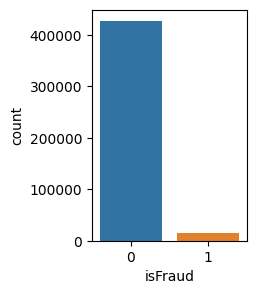

In [115]:
plt.figure(figsize = (2,3))
sns.countplot(x = newdf['isFraud'], orient = "V")

#### Data Analysis of time of Fraud


In [116]:

no_of_seconds_hour = 3600
no_of_seconds_day = 24 * no_of_seconds_hour
no_of_seconds_week = 7 * no_of_seconds_day 
no_of_seconds_month = 30 * no_of_seconds_day

transactions_per_hour = (newdf['TransactionDT'] % no_of_seconds_day) / no_of_seconds_hour
transactions_per_week = (newdf['TransactionDT'] / no_of_seconds_week) % 7
transactions_per_month = newdf['TransactionDT'] / no_of_seconds_month
newdf_ = newdf[newdf['isFraud'] == 1]

transactions_per_hour_f = (newdf_['TransactionDT'] % no_of_seconds_day) / no_of_seconds_hour
transactions_per_week_f= (newdf_['TransactionDT'] / no_of_seconds_week) % 7
transactions_per_month_f = newdf_['TransactionDT'] / no_of_seconds_month

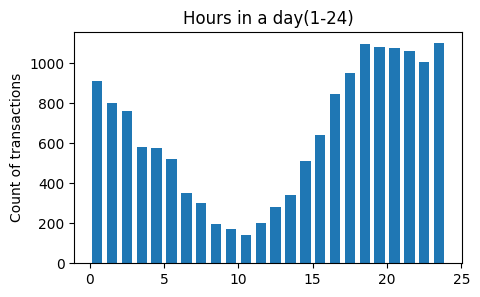

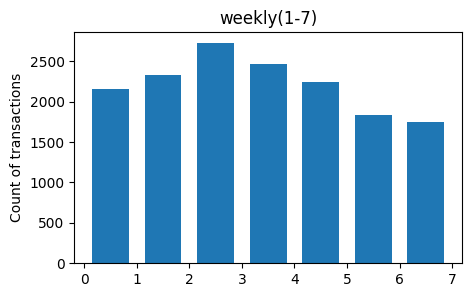

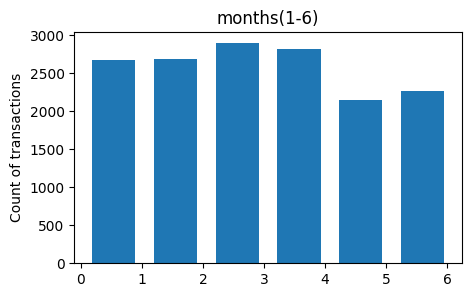

In [117]:
plt.figure(figsize= (5,3))
plt.title("Hours in a day(1-24)")
plt.ylabel('Count of transactions')
# plt.xlabel('Hours in a day(0-24)')
# plt.hist(transactions_per_hour, bins=24, )
plt.hist(transactions_per_hour_f, bins=24,  rwidth=0.7)

plt.show()

plt.figure(figsize= (5,3))
plt.title("weekly(1-7)")
plt.ylabel('Count of transactions')
# plt.xlabel('Hours in a day(0-24)')
plt.hist(transactions_per_week_f, bins=7,  rwidth=0.7)
plt.show()

plt.figure(figsize= (5,3))
plt.title("months(1-6)")
plt.ylabel('Count of transactions')
# plt.xlabel('Hours in a day(0-24)')
plt.hist(transactions_per_month_f, bins=6,  rwidth=0.7)
plt.show()


#### 3. Co-relation Matrix

In [118]:
# corr_mat = ohe_data.corr().abs()


In [119]:
# corr_mat = corr_mat.drop(['TransactionID'])


In [120]:
# corr_mat.isFraud.sort_values(ascending = False).head(20)


In [121]:
# plt.figure(figsize = (80,80))
# sns.heatmap(corr_mat)

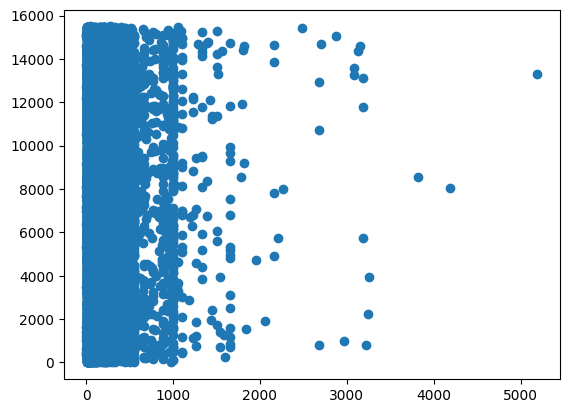

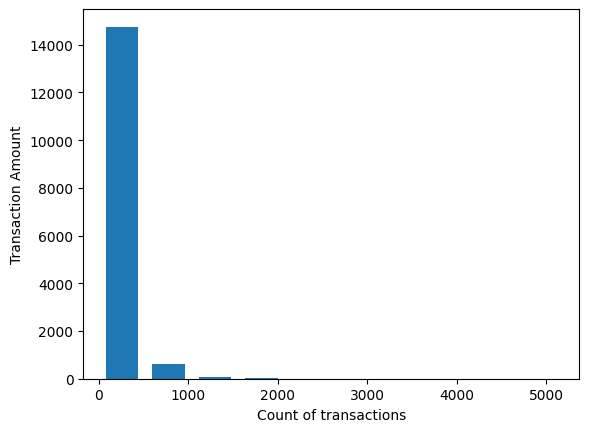

In [122]:
ind = list(range(0, newdf_.shape[0]))

plt.scatter(np.array(newdf_['TransactionAmt']), ind)

plt.show()
plt.xlabel('Count of transactions')
plt.ylabel('Transaction Amount')


plt.hist(newdf_['TransactionAmt'], bins = 10, rwidth=0.7)
plt.show()

In [123]:
newdf_.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,1.549700e+04,15497.0,1.549700e+04,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,...,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000
mean,3.293107e+06,1.0,7.640973e+06,149.039159,9518.917661,365.402271,162.299413,192.199264,296.116216,86.575853,...,71.467779,41.443217,77.500084,55.648887,73.653187,346.821854,174.840761,17.844369,52.519351,30.435826
std,1.624598e+05,0.0,4.425245e+06,232.199546,4774.694104,157.740175,17.451535,45.778838,82.601107,3.812316,...,219.047248,138.959968,257.300337,185.096706,342.620212,2854.098940,887.550285,119.670214,297.613736,172.183295
min,2.987240e+06,1.0,9.019300e+04,0.292000,1015.000000,100.000000,100.000000,100.000000,110.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.165371e+06,1.0,3.885273e+06,35.412000,5680.000000,206.000000,150.000000,138.000000,269.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.288979e+06,1.0,7.457992e+06,75.000000,9633.000000,375.000000,150.000000,224.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.428441e+06,1.0,1.121365e+07,161.000000,13623.000000,514.000000,185.000000,226.000000,324.000000,87.000000,...,30.000000,0.000000,0.000000,0.000000,0.000000,62.111801,25.738899,0.000000,0.000000,0.000000
max,3.577526e+06,1.0,1.581088e+07,5191.000000,18375.000000,600.000000,231.000000,237.000000,536.000000,96.000000,...,3981.000000,2652.000000,3981.000000,3981.000000,11848.000000,82130.953125,18123.957031,3302.000000,5794.500000,3307.000000


#### 4. Plots

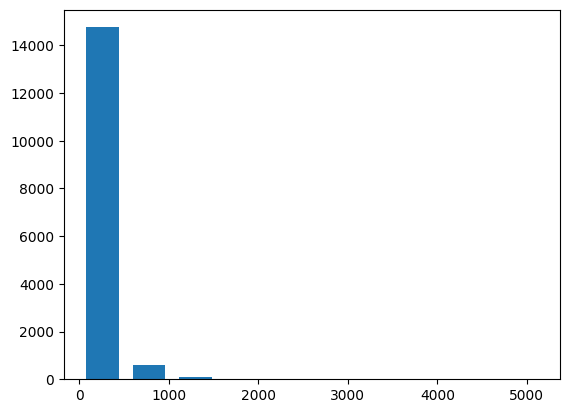

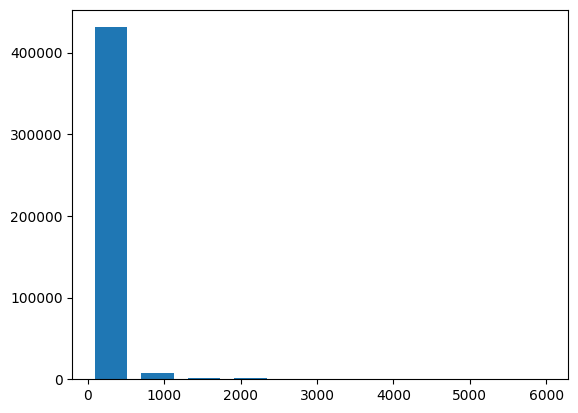

In [124]:
plt.hist(newdf_['TransactionAmt'], bins = 10, rwidth=0.7)
plt.show()
plt.hist(newdf['TransactionAmt'], bins = 10, rwidth=0.7)
plt.show()




#### Hist Plot of Product CD for fraudulent Transactions


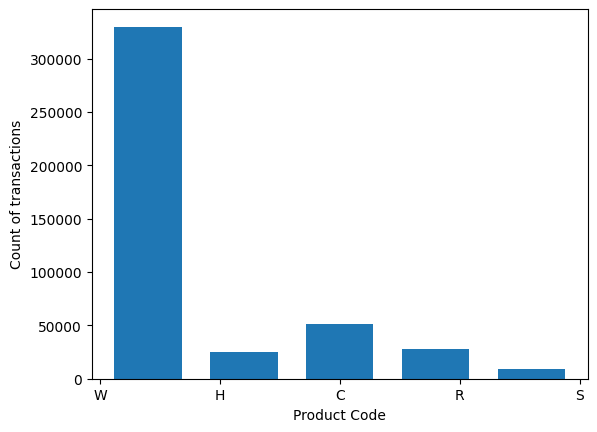

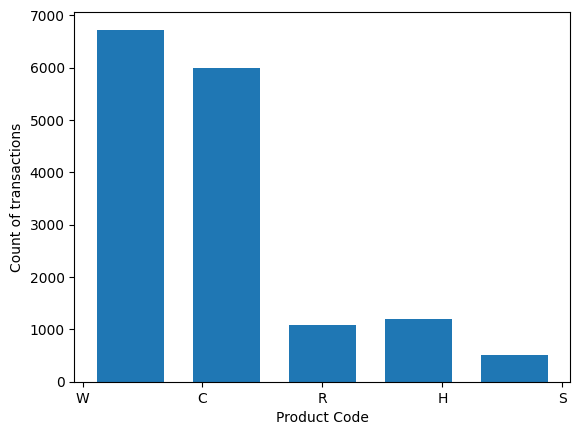

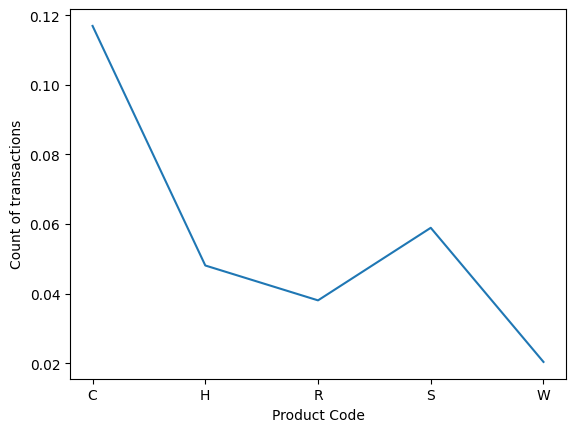

In [125]:
plt.hist(newdf.ProductCD, bins = 5, rwidth=0.7)
plt.ylabel('Count of transactions')
plt.xlabel('Product Code')
plt.show()
plt.ylabel('Count of transactions')
plt.xlabel('Product Code')
plt.hist(newdf_.ProductCD, bins = 5, rwidth=0.7)
plt.show()

prod_counts_all = newdf.ProductCD.value_counts()
prod_counts_fraud = newdf_.ProductCD.value_counts()
plt.ylabel('Count of transactions')
plt.xlabel('Product Code')

percentage_of_fraudulent_per_prod_cat = prod_counts_fraud / prod_counts_all

plt.plot(percentage_of_fraudulent_per_prod_cat)

So from the above graphs we see that Product Category C has unusually high fraudulent cases.

### Removing Outliers

In [126]:
one_hot_encoded_data 
max_threshold=one_hot_encoded_data['TransactionAmt'].quantile(0.95)
min_threshold=one_hot_encoded_data['TransactionAmt'].quantile(0.05)
one_hot_encoded_data=one_hot_encoded_data[(one_hot_encoded_data['TransactionAmt']>min_threshold) & (one_hot_encoded_data['TransactionAmt']<max_threshold)]
# one_hot_encoded_data.isna().sum().sort_values(ascending=False)

In [127]:
target = one_hot_encoded_data.isFraud
one_hot_encoded_data = one_hot_encoded_data.drop(['isFraud'], axis=1)

### PCA

In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(one_hot_encoded_data)

StandardScaler()

In [129]:
scaled_data=scaler.transform(one_hot_encoded_data)
scaled_data

array([[ 8.36228835e-01,  8.01285159e-01, -6.36348833e-01, ...,
        -2.65720644e-01,  8.55534543e-01, -7.44575205e-01],
       [-4.41337177e-01, -4.76331289e-01, -5.24621938e-01, ...,
        -2.65720644e-01,  8.55534543e-01, -7.44575205e-01],
       [ 7.55822746e-01,  7.27669998e-01,  1.99418278e-01, ...,
        -2.65720644e-01, -1.16885988e+00,  1.34304768e+00],
       ...,
       [-1.13717803e+00, -1.15034870e+00,  3.07218334e-04, ...,
        -2.65720644e-01,  8.55534543e-01, -7.44575205e-01],
       [-1.25727144e+00, -1.21792913e+00, -9.35951681e-01, ...,
        -2.65720644e-01,  8.55534543e-01, -7.44575205e-01],
       [ 1.31487948e+00,  1.35711110e+00, -6.23865381e-01, ...,
        -2.65720644e-01,  8.55534543e-01, -7.44575205e-01]])

In [130]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca.fit(scaled_data)

PCA(n_components=0.95)

In [131]:
xpca=pca.transform(scaled_data)

In [132]:
xpca

array([[-9.44384567e-01, -3.22703423e-01, -9.46698526e-01, ...,
         1.31838446e+00, -2.23412022e-01,  5.82083107e-01],
       [-2.01400419e+00, -1.38648272e-02, -6.07603904e-01, ...,
         2.51548379e-01, -4.01661179e-01,  3.06060965e-01],
       [-4.22189660e+00,  9.62484303e-01,  4.96608793e+00, ...,
        -5.65160442e-01, -2.48065466e-01, -3.36175934e-01],
       ...,
       [ 4.24504182e-01, -3.51414990e-01, -5.89312197e+00, ...,
        -3.58810354e-02, -8.71963367e-02, -3.71268709e-04],
       [ 5.51688936e-01, -3.11735553e-01, -6.36342467e+00, ...,
        -8.44203563e-03,  4.83102652e-02, -3.71417018e-02],
       [ 4.70799898e-01,  3.94738110e-01, -5.31492897e+00, ...,
        -4.64640404e-01, -4.77918867e-01, -2.74049176e-01]])

In [133]:
trainx = pd.DataFrame(xpca)
trainx.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
139    0
140    0
141    0
142    0
143    0
Length: 144, dtype: int64

In [134]:
isfd = pd.DataFrame(np.array(target)).rename(columns={0: 'isFraud'})

trainx = pd.concat([isfd, trainx], axis=1)
trainx.shape


(398327, 145)

In [135]:
fraudx = trainx[trainx['isFraud'] == 1]
legitx = trainx[trainx['isFraud']==0].sample(random_state= 10, n=fraudx.shape[0])

In [136]:
balanceddf=pd.concat([fraudx,legitx])
balanceddf.isna().sum()

isFraud    0
0          0
1          0
2          0
3          0
          ..
139        0
140        0
141        0
142        0
143        0
Length: 145, dtype: int64

In [137]:
plt.figure(figsize = (2,3))
count_classes=pd.value_counts(balanceddf['isFraud'], sort=True)
count_classes

1    12653
0    12653
Name: isFraud, dtype: int64

<Figure size 200x300 with 0 Axes>

# MODEL ESTIMATION

In [138]:
y=balanceddf['isFraud']
x=balanceddf.drop(['isFraud'],axis=1)

### Normalising the data before training

In [139]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(balanceddf)
balanceddf=transformer.transform(balanceddf)

C:\Users\Anick\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anick\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Using Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(max_iter=10000)

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.2,stratify=y, random_state=1)

In [142]:
reg.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [143]:
from sklearn.metrics import accuracy_score

ypredtrain=reg.predict(X_train)
trainingacc=accuracy_score(ypredtrain,Y_train)
trainingacc

0.7576071922544951

In [144]:
ypredtest=reg.predict(X_test)
testacc=accuracy_score(ypredtest,Y_test)
testacc

0.75760568945081

In [145]:
from sklearn.metrics import confusion_matrix, f1_score
print("Confusion Matrix : \n",confusion_matrix(Y_test, ypredtest))

Confusion Matrix : 
 [[1922  609]
 [ 618 1913]]


In [146]:
np.unique(ypredtest)

array([0, 1], dtype=int64)

In [147]:
pd.DataFrame(ypredtest).value_counts()

0    2540
1    2522
dtype: int64

In [148]:
from sklearn.metrics import f1_score
f1_score(Y_test,ypredtest)

0.7571739560657035

In [149]:
test=pd.read_csv("test.csv")

In [150]:
test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3460689,12245831,325.000,W,12932,361.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3415050,10807203,37.257,C,14276,177.0,185.0,mastercard,137.0,credit,...,chrome 63.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9600 Build/R16NW
2,3408682,10685267,100.000,R,16506,554.0,150.0,visa,226.0,credit,...,chrome 64.0,24.0,1536x960,match_status:2,T,F,T,F,desktop,Windows
3,3389297,10160809,57.950,W,9500,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3366334,9492365,34.258,C,15885,545.0,185.0,visa,138.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147630,3193088,4738133,3340.640,W,7676,512.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147631,3400907,10444920,171.000,W,2772,512.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147632,3489602,13181877,404.950,W,7919,194.0,150.0,mastercard,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147633,3534022,14431969,35.950,W,11839,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
test.isna().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
id_36             112186
id_37             112186
id_38             112186
DeviceType        112226
DeviceInfo        117892
Length: 433, dtype: int64

## Preparing Test data set

In [152]:
test=pd.read_csv('test.csv')

In [153]:
drop_cols

Index(['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14',
       'V138',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=208)

In [154]:
test=test.drop(columns=drop_cols)

In [155]:
test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3460689,12245831,325.000,W,12932,361.0,150.0,visa,226.0,debit,...,0.0,0.000000,0.000000,0.000000,325.0,325.0,325.0,0.0,0.0,0.0
1,3415050,10807203,37.257,C,14276,177.0,185.0,mastercard,137.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3408682,10685267,100.000,R,16506,554.0,150.0,visa,226.0,credit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3389297,10160809,57.950,W,9500,321.0,150.0,visa,226.0,debit,...,0.0,35.950001,35.950001,35.950001,0.0,0.0,0.0,0.0,0.0,0.0
4,3366334,9492365,34.258,C,15885,545.0,185.0,visa,138.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147630,3193088,4738133,3340.640,W,7676,512.0,150.0,visa,226.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
147631,3400907,10444920,171.000,W,2772,512.0,150.0,visa,226.0,debit,...,0.0,507.000000,507.000000,507.000000,0.0,0.0,0.0,0.0,0.0,0.0
147632,3489602,13181877,404.950,W,7919,194.0,150.0,mastercard,166.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
147633,3534022,14431969,35.950,W,11839,490.0,150.0,visa,226.0,debit,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df_num = test.select_dtypes(exclude='object')
df_cat = test.select_dtypes(include='object')

In [157]:
for cols in df_cat.columns :
    df_cat[cols] = df_cat[cols].fillna("NA")

In [158]:
dfna = (df_num.isnull().sum()) / df_cat.shape[0] 

for cols in df_num.columns :
    if dfna[cols]:
        df_num[cols] = df_num[cols].fillna(df_num[cols].median())

In [159]:
newdf=pd.concat([df_num,df_cat],axis=1)


In [160]:
ohe_data = pd.get_dummies(newdf, columns = ['ProductCD','card4','card6','P_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'])
one_hot_encoded_data = ohe_data



In [161]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(one_hot_encoded_data)

StandardScaler()

In [162]:
scaled_data=scaler.transform(one_hot_encoded_data)
scaled_data




array([[ 1.0436057 ,  1.05220914,  0.74240477, ..., -0.26512627,
        -1.18813581,  1.36584427],
       [ 0.77570832,  0.74055817, -0.3777207 , ..., -0.26512627,
         0.84165463, -0.73214789],
       [ 0.73832865,  0.71414309, -0.13347486, ..., -0.26512627,
         0.84165463, -0.73214789],
       ...,
       [ 1.21332277,  1.25498542,  1.053634  , ..., -0.26512627,
         0.84165463, -0.73214789],
       [ 1.47406471,  1.5257937 , -0.38280859, ..., -0.26512627,
        -1.18813581,  1.36584427],
       [-1.42784291, -1.33462901, -0.42607315, ..., -0.26512627,
         0.84165463, -0.73214789]])

In [163]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=30)
# pca.fit(scaled_data)


In [164]:
xpca=pca.transform(scaled_data)

In [165]:
xpca

array([[-3.26188314,  0.30250338, -0.28296096, ..., -0.90531413,
         0.03936603,  0.46112289],
       [11.86443095, -3.22224062, -0.47721676, ...,  0.32501888,
         0.82706352, -0.14302975],
       [ 0.04987781, -0.2471871 , -5.49101125, ..., -0.09820025,
        -0.06861105,  0.05207706],
       ...,
       [-3.75532098,  0.24304581,  3.19545968, ..., -0.19705911,
        -0.26277349, -0.18908633],
       [-4.0458759 , -0.0614456 ,  3.37468457, ..., -0.36899615,
         0.05924347, -0.05344855],
       [15.78820233, -4.76751506, 14.97756261, ..., -0.0159716 ,
        -0.08789473, -0.22664014]])

In [166]:
ypred=reg.predict(xpca)

In [167]:
# format = pd.DataFrame(ypred).to_csv('Initital_sub2.csv')

### Using Decision Tree



In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [170]:
ypred=clf.predict(X_test)

In [171]:
f1_score(Y_test,ypredtest)

0.7571739560657035

In [172]:
ypred=clf.predict(xpca)

In [173]:
ypred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [174]:
format = pd.DataFrame(ypred).to_csv('Initital_sub2.csv')

#### Score=0.69

### HyperParameter Tuning for Decision Tree

In [175]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,None]
}

In [176]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [177]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]})

In [178]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [179]:
grid.best_score_

0.7376002049480311

In [180]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

### Didn't improved score